# Data Analysis of Physical Fatigue in Automobile Drivers from spirometry data collected from public transport drivers.
This notebook contains analysis of the dataset associated with [this](http://ethesis.nitrkl.ac.in/8323/1/2016_PhD_509BM403_bpnayak_Analysis.pdf) research thesis of my research guide at NIT Rourkela - DR. Bibhukalyan Prasad Nayak.

In [2]:
import numpy as np
import pandas as pd


df = pd.read_csv("train.csv")

### 1. The Dataset

In [3]:
df.head(2)

,TIME,ID,Patient,Date,Age(Yrs),Ht(Cms),Wt(Kgs),Sex,Smoker,FVC (L),...,FEF 50% (L/s),FEF 75% (L/s),FEV.5/FVC(%),FEV1/FVC (%),FEV3/FVC (%),FVC Time (Sec),ExplTime (Sec),MVV (L/min),MRf (1/min),MVt (L)
0,8:00 AM,12.0,Tika,31/05/2009,36.0,160.0,72.0,Male,Non Smoker,2.54,...,3.75,1.73,74.02,93.7,100.0,1.38,0.11,97.0,72.12,1.34
1,10:45 AM,8.0,Tika,31/05/2009,36.0,160.0,72.0,Male,Non Smoker,2.55,...,3.89,1.67,76.47,94.9,100.0,1.31,0.06,114.0,74.12,1.54


### 2. Droping and modifying some columns  as necessary

In [4]:
df = df.drop(columns=['Date', 'Sex', 'Smoker'])

In [17]:
#de-identifying the patient's name
subjects = []
ctr = 1
for x in df['Patient'].unique():
    if type(x) == str:
        name = "patient" + str(ctr)
        ctr += 1
        df.loc[(df['Patient'] == x), 'Patient'] = name 
        subjects.append(name)
print(df.columns)

Index(['TIME', 'ID', 'Patient', 'Age(Yrs)', 'Ht(Cms)', 'Wt(Kgs)', 'FVC  (L)',
       'FIVC (L)', 'FEV.5(L)', 'FEV1 (L)', 'FEV3 (L)', 'PEFR (L/s)',
       'PIFR (L/s)', 'FEF25-75 (L/s)', 'FEF75-85 (L/s)', 'FEF.2-1.2(L/s)',
       'FEF 25% (L/s)', 'FEF 50% (L/s)', 'FEF 75% (L/s)', 'FEV.5/FVC(%)',
       'FEV1/FVC (%)', 'FEV3/FVC (%)', 'FVC Time (Sec)', 'ExplTime (Sec)',
       'MVV (L/min)', 'MRf (1/min)', 'MVt (L)'],
      dtype='object')


## Spirometer Recording
Spirometry is the most commonly used measure in the clinical
assessment of true lungs function. It measures the air moving in and out of the lungs
in the form of a series of lungs volumes and capacities (Figure 1.5) and the outcomes are
collectively termed Pulmonary Function Tests (PFTs) or Lungs Function Tests (LFTs).
Spirometer recording are used as an assessment and diagnostic measure rather than an action
required in normal daily activities. At the same time, since peripheral fatigue initiates
from skeletal muscles, the efficiency of respiratory muscles is also decreased both in acute
fatigue (from moderate to severe exercise) and slow fatigue (from prolonged monotonous
task like driving). Thus, the effect of fatigued respiratory muscles on lungs function can be
assessed from spirometer findings. Muscles that are typically considered during respiration
are the diaphragm, the abdominal muscles, the intercostals, anterior scalenes, and serratus
anterior. It has been shown that, the diaphragm fatigues in a short period. Although
extra-diaphragmatic muscles are able to compensate, they too fatigue with time and thus,
compromise the lungs performance. **By monitoring the decrease in lungs performance from
spirometer recording, an approximate estimate of peripheral fatigue can be obtained.
The most important indicators of pulmonary functional status that can be measured** from
spirometer recordings are forced expiratory volume in one second (FEV1) and forced vital
capacity (FVC) from a full inhalation while the ratio, **FEV1/FVC is the most sensitive
indicator that differentiates restrictive to obstructive profile of pulmonary function**
While studying the peripheral fatigue, the accurate measurement requires the subject’s forced
maximum effort during expiration which helps the researchers to study the limitation
of fatigue on performance. Spirometer recordings, at regular intervals, during any task give
a pneumatogram that can give abundant information on the severity of peripheral fatigue.

### Visualizing FEV1/FVC(%) ratio over time for all the subjects and its trends with respect to FEV1 and FVC:

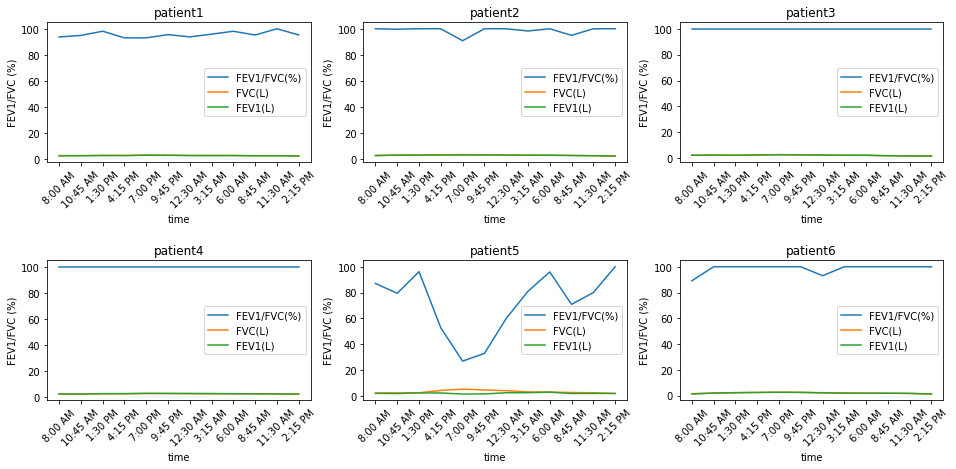

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(6,6))
for x in range(0, len(subjects)):
    patient = df.loc[df['Patient'] == subjects[x]]
    X = patient['TIME']
    Y1 = patient['FEV1/FVC (%)']
    Y2 = patient['FVC  (L)']
    Y3 = patient['FEV1 (L)']
    plt.subplot(2, 3, x+1)
    plt.subplots_adjust(right = 2.2, hspace=0.7, bottom=0.005)
    plt.plot(X, Y1, label='FEV1/FVC(%)')
    plt.plot(X,Y2, label='FVC(L)')
    plt.plot(X,Y3, label='FEV1(L)')
    plt.legend(loc='center right')
    current_axis = plt.gca().xaxis
    for item in current_axis.get_ticklabels():
        item.set_rotation(45)    
    plt.title(subjects[x])
    plt.xlabel("time")
    plt.ylabel("FEV1/FVC (%)")

 ### Analysis
In restrictive lung function, both forced expiratory volume in one second (FEV1) and forced vital capacity (FVC) are reduced, however, the decline in FVC is more than that of FEV1, resulting in a higher than 80% FEV1/FVC ratio. In obstructive lung disease however, the FEV1/FVC is less than 70%, indicating that FEV1 is significantly reduced when compared to the total expired volume. This indicates that the FVC is also reduced, but not by the same ratio as FEV1. <br>

**The FEV1/FVC (%) in all patients are > 80% with almost equal variations in FEV1 and FVC leading to an assumption of restrictive lung deterioration due to peripheral fatigue.<br>
Whereas only "patient5" between 4:15 PM to 12:30 AM shows clear signs of obstructive lung disorder, which can be due to reasons not known or exposed by this dataset.**